Starting Dask computation...
✅ Success! Total unique words found: 549


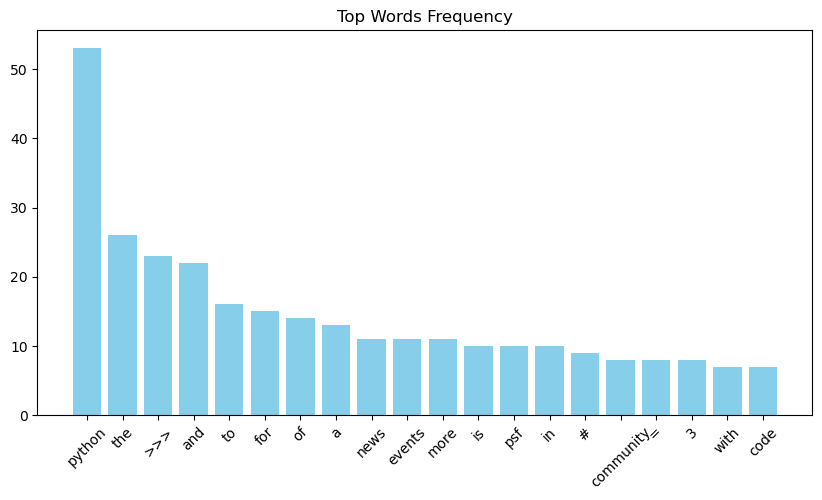

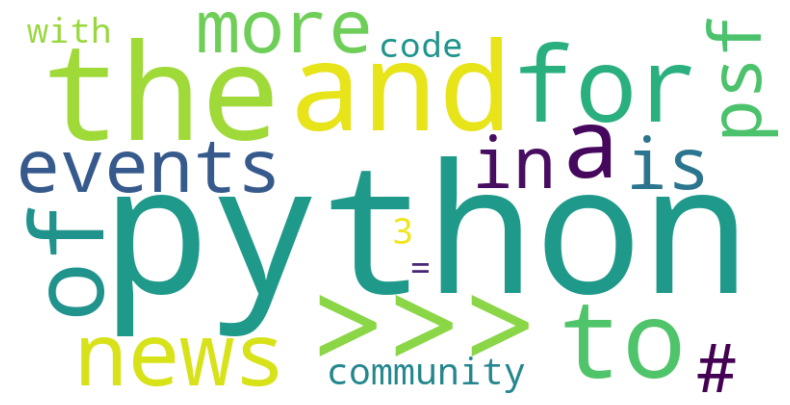

In [6]:
import dask.bag as db
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Fetch Function 
def fetch(url):
    print(f"Trying to fetch: {url}...") # 
    try:
        response = requests.get(url, timeout=10) # Timeout 
        if response.status_code == 200:
            print(f"Success: {url}")
            return response.text
        else:
            print(f"Failed {url} with status {response.status_code}")
            return ""
    except Exception as e:
        print(f"Error fetching {url}: {e}") # Error print 
        return ""

# 2. Parse Function
def parse(html):
    if not html: return []
    soup = BeautifulSoup(html, "html.parser")
    text = soup.get_text()
    words = text.lower().split()
    return words

# 3. URLs 
urls = [
    "https://www.python.org/",
    "https://en.wikipedia.org/wiki/Data_science", 
    "https://en.wikipedia.org/wiki/Artificial_intelligence"
]

# 4. Running Dask
print("Starting Dask computation...")
bag = db.from_sequence(urls)
html_bag = bag.map(fetch)
word_bag = html_bag.map(parse)
flattened = word_bag.flatten()

# Result Compute karein
word_counts = flattened.frequencies().compute()

# 5. Check Output before Plotting
if not word_counts:
    print("❌ no data found...")
else:
    print(f"✅ Success! Total unique words found: {len(word_counts)}")
    
    # Sort and Plot
    top_words = sorted(word_counts, key=lambda x: x[1], reverse=True)[:20]
    
    # Bar Chart
    words_list, counts_list = zip(*top_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words_list, counts_list, color='skyblue')
    plt.title("Top Words Frequency")
    plt.xticks(rotation=45)
    plt.show()

    # WordCloud
    word_dict = dict(top_words)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()